In [33]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
#import data
Tesla=pd.read_csv('../dataset/TSLA.csv',index_col='Date')
Tesla.index=pd.to_datetime(Tesla.index)

Ford=pd.read_csv('../dataset/FORD.csv',index_col='Date')
Ford.index=pd.to_datetime(Ford.index)


In [43]:
#count daily return
Tesla['Return']=Tesla['Close'].pct_change(1)
Tesla=Tesla.dropna()

Ford['Return']=Ford['Close'].pct_change(1)
Ford=Ford.dropna()

#concatenate daily return of three stocks
ret_df=pd.concat([Tesla['Return'], Ford['Return']],axis=1)
ret_df.columns=['Tesla','Ford']
ret_df.head()

,Tesla,Ford
Date,,
2018-03-27,-0.082188,0.034014
2018-03-28,-0.076653,-0.065789
2018-03-29,0.032392,0.000000
2018-04-02,-0.051291,-0.028169
2018-04-03,0.059609,-0.014493


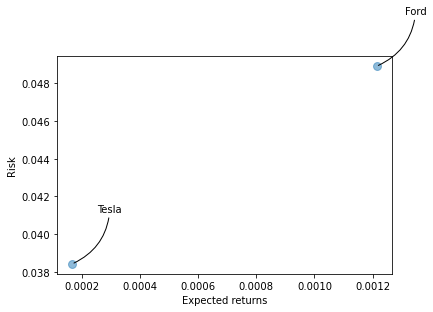

In [53]:
area = np.pi*20
plt.scatter(ret_df.mean(), ret_df.std(),alpha = 0.5,s =area)
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(ret_df.columns, ret_df.mean(), ret_df.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))